In [37]:
!pip install konlpy
!pip install koreanize-matplotlib

In [114]:
import pandas as pd
import numpy as np
import konlpy

import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
from PIL import Image, ImageEnhance
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


In [38]:
youtube_df = pd.read_csv('/content/실종재난문자 유튜브 크롤링_20240725.csv')
youtube_df

,댓글내용
0,기술의 발전은 이렇게 써야함.그리고 문자를 받고 그냥 지나치지 않은 여성분 참 훌륭...
1,지역방송만 나올지 알고 인터뷰했는데 메인까지 나왔네요^^ 부끄럽네요. 우연하게 바...
2,실종자 경보 문자 이런 건 적극 홍보해야~
3,좋다 저정도야 귀찮아도 되니까 진행시켜.
4,몰랐는데 참 좋은 정보입니다!!!!솔직히 경보문자는 자주 와도 보게되요!아주 좋은 ...
...,...
303,저거 알아보는것도 힘들텐데 여자가 잘했네그와중에 애국심 이지랄 ㅋㅋㅋ
304,이런것들은 꼭 누가 죽어나가야 학습을 해요 그러면서 세금은 꼬바꼬박 다 쳐받고
305,제대로 된 나라로 가고있다..훌륭한 정치를하고 계시는 문재인 정부를 강력하게 지지한...
306,실종자 왜찾음 그냥 실종되게 냅두지


In [39]:
okt = konlpy.tag.Okt()
word_df = pd.DataFrame({'word': okt.nouns(' '.join(li for li in youtube_df['댓글내용'].astype(str)))})
word_df

,word
0,기술
1,발전
2,함
3,문자
4,그냥
...,...
1667,실종
1668,거
1669,소리
1670,하루


In [40]:
word_df['count'] = word_df['word'].str.len()
word_df

,word,count
0,기술,2
1,발전,2
2,함,1
3,문자,2
4,그냥,2
...,...,...
1667,실종,2
1668,거,1
1669,소리,2
1670,하루,2


In [41]:
group_df = word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
group_df

,word,n
228,문자,98
366,실종,38
162,더,23
24,거,23
540,정말,21
...,...,...
274,봄,1
273,볼때,1
272,볼,1
270,보호,1


In [42]:
px.bar(group_df.head(20), x = 'word', y = 'n', text_auto=True)

In [8]:
word_dic = group_df.set_index('word').to_dict()['n']
word_dic

{'문자': 98,
 '실종': 38,
 '더': 23,
 '거': 23,
 '정말': 21,
 '신고': 20,
 '실종자': 18,
 '다행': 17,
 '시스템': 16,
 '생각': 16,
 '진짜': 15,
 '사람': 15,
 '걸': 14,
 '재난': 14,
 '가족': 13,
 '치매': 13,
 '것': 13,
 '분': 12,
 '제도': 12,
 '좀': 12,
 '경찰': 11,
 '이건': 11,
 '요': 11,
 '이': 11,
 '그냥': 10,
 '경보': 10,
 '일': 10,
 '우리나라': 10,
 '관심': 10,
 '저': 9,
 '수': 8,
 '악용': 8,
 '뭐': 8,
 '정책': 8,
 '오': 8,
 '범죄자': 8,
 '대한민국': 7,
 '발송': 7,
 '사진': 7,
 '바로': 7,
 '이용': 7,
 '일이': 7,
 '여성': 7,
 '뉴스': 7,
 '기술': 7,
 '방법': 6,
 '국민': 6,
 '이제': 6,
 '제': 6,
 '왜': 6,
 '건': 6,
 '칭찬': 6,
 '나라': 6,
 '걱정': 6,
 '다시': 5,
 '세금': 5,
 '정보': 5,
 '최고': 5,
 '발전': 5,
 '보고': 5,
 '누가': 5,
 '복': 5,
 '긴급': 5,
 '발견': 5,
 '시민': 5,
 '지역': 5,
 '우리': 5,
 '마음': 5,
 '얼마': 5,
 '진작': 5,
 '아주': 5,
 '할머니': 5,
 '개인': 4,
 '자주': 4,
 '앞': 4,
 '코로나': 4,
 '노인': 4,
 '홍보': 4,
 '때': 4,
 '누구': 4,
 '알': 4,
 '사회': 4,
 '저런': 4,
 '기분': 4,
 '확인': 4,
 '계속': 4,
 '게': 4,
 '시간': 4,
 '소식': 4,
 '활용': 4,
 '스미싱': 4,
 '할아버지': 4,
 '주위': 4,
 '위치': 4,
 '효과': 4,
 '납치': 4,
 '아이디어': 4,
 '얼굴': 3

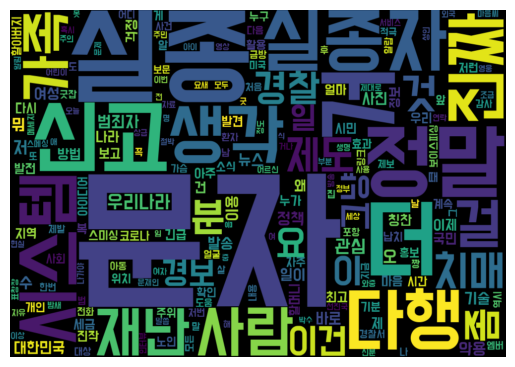

In [43]:
font_path ='/content/BMDOHYEON_ttf.ttf'
wc = WordCloud(width=1000, height=700,font_path=font_path).generate_from_frequencies(word_dic)
plt.axis('off')
plt.imshow(wc,interpolation ='bilinear')
plt.show()

In [44]:
sentiword = pd.read_json('/content/SentiWord_info.json')
sentiword

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14838,반신반의하다,반신반의,0
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1


In [97]:
stopwords = ['문제', '생각', '그냥', '진짜', '지금', '정도', '때문', '이제', '하나', '모든','더','거','정말','요']

In [98]:
# 형태소 분석기 설정
# okt = Okt()

# 댓글 내용에서 명사 추출 및 단어 빈도수 집계
word_df = pd.DataFrame({'word': okt.nouns(' '.join(youtube_df['댓글내용'].astype(str)))})
word_df = word_df[word_df['word'].str.len() > 1]
word_df = word_df[~word_df['word'].isin(stopwords)]
# group_df = word_df.groupby('word', as_index=False)['count'].count().sort_values(by='count', ascending=False)
group_df = word_df.groupby('word', as_index=False).agg(n=('word', 'count')).sort_values('n', ascending=False)
group_df.head(20)

,word,n
175,문자,98
289,실종,38
285,신고,20
290,실종자,18
114,다행,17
281,시스템,16
227,사람,15
415,재난,14
8,가족,13
500,치매,13


In [99]:
# 감성 점수 계산 함수 (NaN 처리 추가)
def sentiment_score_per_repl(comment):
    repl_score = 0
    try:
        if isinstance(comment, str):  # comment가 문자열인지 확인
            for root, score in zip(sentiword['word_root'], sentiword['polarity']):
                if root in comment:
                    repl_score += score
    except TypeError:  # TypeError 발생 시 pass (무시)
        pass
    return repl_score

# 각 댓글에 대해 감성 점수 계산하여 데이터프레임 생성 (NaN 처리)
df_sentiment = pd.DataFrame({
    '댓글 내용': youtube_df['댓글내용'],
    '감성점수 총합': youtube_df['댓글내용'].apply(sentiment_score_per_repl)
})
df_sentiment.reset_index(drop=True, inplace=True)
df_sentiment.head()

,댓글 내용,감성점수 총합
0,기술의 발전은 이렇게 써야함.그리고 문자를 받고 그냥 지나치지 않은 여성분 참 훌륭...,22
1,지역방송만 나올지 알고 인터뷰했는데 메인까지 나왔네요^^ 부끄럽네요. 우연하게 바...,-61
2,실종자 경보 문자 이런 건 적극 홍보해야~,-9
3,좋다 저정도야 귀찮아도 되니까 진행시켜.,11
4,몰랐는데 참 좋은 정보입니다!!!!솔직히 경보문자는 자주 와도 보게되요!아주 좋은 ...,61


In [100]:
# 긍정, 부정 댓글 필터링
df_repl_positive = df_sentiment[df_sentiment['감성점수 총합'] >= 0]
df_repl_negative = df_sentiment[df_sentiment['감성점수 총합'] <= -20]

In [101]:
# 형태소 분석기 설정
# okt = Okt()

# 긍정 댓글 내용에서 명사 추출 및 단어 빈도수 집계
positive_word_df = pd.DataFrame({'word': okt.nouns(' '.join(df_repl_positive['댓글 내용'].astype(str)))})
positive_word_df = positive_word_df.query('word not in @stopwords')
positive_word_df['count'] = positive_word_df['word'].str.len()

positive_group_df = positive_word_df.groupby('word', as_index=False)['count'].count().sort_values(by='count', ascending=False)
positive_group_df.head()

,word,count
101,문자,45
149,시스템,12
154,실종,12
125,분,8
64,다행,8


In [102]:
df_repl_positive.sort_values('감성점수 총합', ascending=False).head(20)

,댓글 내용,감성점수 총합
4,몰랐는데 참 좋은 정보입니다!!!!솔직히 경보문자는 자주 와도 보게되요!아주 좋은 ...,61
40,실종경보문자 정말 좋은것 같다,41
149,오 좋은 정책이구먼,41
34,정말 좋은방법이네요 최고!!,40
186,참좋은 정책임,40
86,정말 좋은 기획인것 같습니다,39
109,이건 정말 좋타다수의 인원이 찾는효과,39
51,좋은 정책같네요...실종자를 찾는데 제보하신 분들께 감사의 말씀을 드리고 싶네요신고...,39
12,회사에서 일하다 오전에 문자 받은적있는데오후에 찾았다는 문자보고 다행이다 했어요정말...,39
55,이런 정책 정말 좋아,37


In [103]:
# 형태소 분석기 설정
#okt = Okt()

# 부정 댓글 내용에서 명사 추출 및 단어 빈도수 집계
negative_word_df = pd.DataFrame({'word': okt.nouns(' '.join(df_repl_negative['댓글 내용'].astype(str)))})
negative_word_df = negative_word_df.query('word not in @stopwords')
negative_word_df['count'] = negative_word_df['word'].str.len()
negative_group_df = negative_word_df.groupby('word', as_index=False)['count'].count().sort_values(by='count', ascending=False)
negative_group_df.head()

,word,count
110,문자,16
168,실종,15
166,신고,8
275,치매,7
169,실종자,6


In [104]:
df_repl_negative.sort_values('감성점수 총합').head(20)

,댓글 내용,감성점수 총합
206,아니 포항 경찰서는 뭐하는데....저번달 20일지나서 친구 실종되서 가족들이 2일뒤...,-79
50,마음이 아프네요좋든 싫든 사람은 추억을 안고 가는 길인데어쩌다 이제는 누구나 생각하...,-74
298,재난문자도 너무 시시콜콜해서 짜증나는데 실종 신고까지 더해지면 더 힘들 것 같다,-65
1,지역방송만 나올지 알고 인터뷰했는데 메인까지 나왔네요^^ 부끄럽네요. 우연하게 바...,-61
170,선친이 50여년 전 지방에 단체관광 갔다가 주변인들의 관심부족으로 실종되었다가 한 ...,-57
235,재난문자처럼 전국민에게 계속 보내라.나아시는 아줌마 아들도 성인 실종되서 수십년째...,-55
200,최소한12시간안에 발견해야 하는데11시간 찾고 문자 발송하냐미련한거냐 멍청한거냐바...,-47
182,이런 메세지면 절때 무시못하지,-40
207,아으..살아있는 구울들;; 그냥 집에 가둬놔야지;; 저렇게 멋대로 돌아댕기면서 인간...,-37
14,"문자 계속 와서 귀찮고 번거롭다는 사람들... 자기 부모, 자식이 실종되었다고 생각...",-37


In [105]:
# 워드 클라우드 생성
def generate_wordcloud(text, title):
    font_path = '/content/BMDOHYEON_ttf.ttf'
    wordcloud = WordCloud(font_path=font_path, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [106]:
df_repl_positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   댓글 내용    160 non-null    object
 1   감성점수 총합  161 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


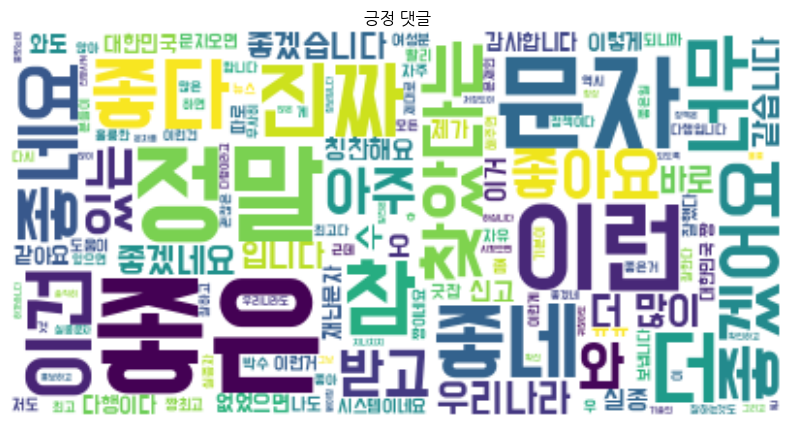

In [107]:
# NaN 값을 공백 문자열로 대체
df_repl_positive['댓글 내용'] = df_repl_positive['댓글 내용'].fillna('')

# 모든 값을 문자열로 변환
df_repl_positive['댓글 내용'] = df_repl_positive['댓글 내용'].astype(str)

positive_text = ' '.join(df_repl_positive['댓글 내용'])
generate_wordcloud(positive_text, '긍정 댓글')




In [108]:
df_repl_negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1 to 304
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   댓글 내용    40 non-null     object
 1   감성점수 총합  40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


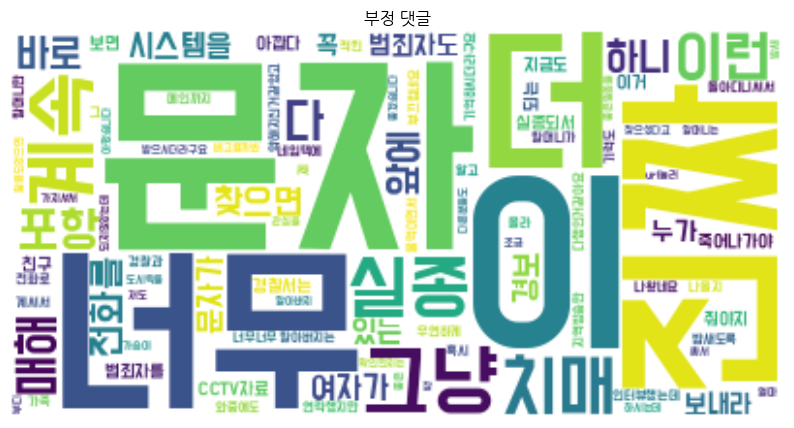

In [109]:
# 부정 댓글 워드 클라우드 시각화
negative_text = ' '.join(df_repl_negative['댓글 내용'])
generate_wordcloud(negative_text, '부정 댓글')

In [110]:
dic_positive_word = positive_group_df.set_index('word').to_dict()['count']
dic_positive_word

{'문자': 45,
 '시스템': 12,
 '실종': 12,
 '분': 8,
 '다행': 8,
 '이건': 8,
 '정책': 8,
 '신고': 7,
 '일': 7,
 '우리나라': 7,
 '실종자': 7,
 '제도': 7,
 '대한민국': 6,
 '것': 6,
 '칭찬': 6,
 '사람': 6,
 '가족': 6,
 '일이': 6,
 '발전': 5,
 '재난': 5,
 '복': 5,
 '방법': 5,
 '악용': 5,
 '아주': 5,
 '바로': 4,
 '나라': 4,
 '수': 4,
 '최고': 4,
 '오': 4,
 '얼마': 3,
 '뉴스': 3,
 '좀': 3,
 '짱': 3,
 '기분': 3,
 '제보': 3,
 '마음': 3,
 '제': 3,
 '이': 3,
 '기술': 3,
 '여성': 3,
 '걱정': 3,
 '활용': 3,
 '경찰': 3,
 '굿잡': 3,
 '걸': 3,
 '국민': 3,
 '박수': 2,
 '관심': 2,
 '시간': 2,
 '보고': 2,
 '때': 2,
 '음': 2,
 '확인': 2,
 '선진국': 2,
 '제대로': 2,
 '이용': 2,
 '정부': 2,
 '도움': 2,
 '정보': 2,
 '사회': 2,
 '적극': 2,
 '게': 2,
 '문재인': 2,
 '사진': 2,
 '경보': 2,
 '저': 2,
 '발송': 2,
 '홍보': 2,
 '자주': 2,
 '자유': 2,
 '우리': 2,
 '보문': 2,
 '치매': 2,
 '날': 2,
 '아동': 2,
 '할머니': 2,
 '최고다': 2,
 '다시': 2,
 '다음': 2,
 '역시': 2,
 '천사': 2,
 '효과': 2,
 '함': 2,
 '알람': 2,
 '영웅': 2,
 '확산': 1,
 '일반인': 1,
 '오구': 1,
 '후': 1,
 '영': 1,
 '영상': 1,
 '오지랖': 1,
 '임': 1,
 '자긍심': 1,
 '자신': 1,
 '화이': 1,
 '여지': 1,
 '훌륭': 1,
 '오전': 1,
 '왜': 1,
 '인터

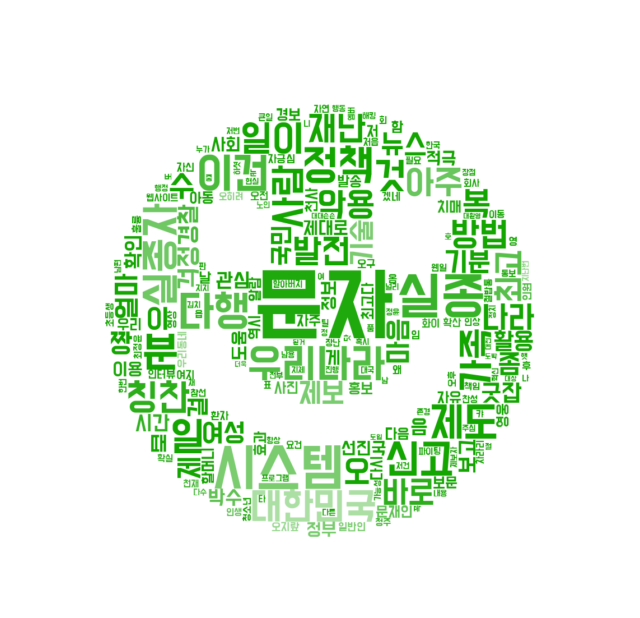

In [115]:
icon = Image.open('/content/스마일 이미지 2.png')
positive_mask = np.array(icon)

plt.subplots(figsize=(8,8))
wc = WordCloud(width=1000, height=700, font_path=font_path, mask = positive_mask, background_color='white').generate_from_frequencies(dic_positive_word)
plt. axis('off')
img_colors = ImageColorGenerator(positive_mask, default_color=(255,255,255))
wc = wc.recolor(color_func=img_colors)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [112]:
dic_negative_word = negative_group_df.set_index('word').to_dict()['count']
dic_negative_word

{'문자': 16,
 '실종': 15,
 '신고': 8,
 '치매': 7,
 '실종자': 6,
 '가족': 5,
 '범죄자': 5,
 '이': 5,
 '것': 4,
 '뭐': 4,
 '경찰': 4,
 '관심': 4,
 '세금': 3,
 '할머니': 3,
 '계속': 3,
 '알': 3,
 '전화': 3,
 '포항': 3,
 '사진': 3,
 '납치': 3,
 '사람': 3,
 '집': 3,
 '뉴스': 3,
 '분': 3,
 '경찰서': 3,
 '바로': 3,
 '걸': 3,
 '경보': 2,
 '확인': 2,
 '할아버지': 2,
 '저번': 2,
 '말': 2,
 '시스템': 2,
 '사건': 2,
 '누가': 2,
 '누구': 2,
 '환자': 2,
 '재난': 2,
 '절박': 2,
 '보고': 2,
 '여자': 2,
 '연락': 2,
 '왜': 2,
 '제': 2,
 '와중': 2,
 '꼭': 2,
 '나가야': 2,
 '상금': 2,
 '마음': 2,
 '해': 2,
 '자료': 2,
 '하니': 2,
 '성인': 2,
 '해당': 2,
 '스메싱': 2,
 '국민': 2,
 '시간': 2,
 '앞': 2,
 '좀': 2,
 '기술': 2,
 '친구': 2,
 '이상': 1,
 '욕': 1,
 '이번': 1,
 '위': 1,
 '오늘': 1,
 '이면': 1,
 '용도': 1,
 '이신': 1,
 '우연': 1,
 '우리': 1,
 '우리나라': 1,
 '이름': 1,
 '유산': 1,
 '얼마': 1,
 '예외': 1,
 '애': 1,
 '아동': 1,
 '아들': 1,
 '아이': 1,
 '아이디어': 1,
 '아줌마': 1,
 '안고': 1,
 '안당': 1,
 '안옴': 1,
 '안전': 1,
 '알람': 1,
 '알림': 1,
 '알코': 1,
 '애국심': 1,
 '영향': 1,
 '얘': 1,
 '어디': 1,
 '언론': 1,
 '얼른': 1,
 '인간': 1,
 '엊그제': 1,
 '여': 1,
 '여가부': 1,
 '여경': 1,
